In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV, Ridge, Lasso

%matplotlib inline

In [2]:
# Удалить отступ у строки заголовка
train = pd.read_csv('data/train.csv', sep='\t', index_col='Unnamed: 0')
test = pd.read_csv('data/test.csv', sep='\t', index_col='Unnamed: 0')
test = test.iloc[:, 1:]       # убираем 0 столбец таргет

seed = 42

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,1,1,0,0,0,0,0,0.090909,0,0,...,0.221395,0,1,0,0,0.222222,1,1,1,1
1,1,1,0,0,1,0,0,0.090909,0,0,...,0.241508,0,1,0,0,0.111111,1,1,1,0
2,0,1,0,0,1,0,0,0.090909,0,0,...,0.123067,0,1,0,0,0.444444,1,1,1,1
3,0,1,0,0,1,0,0,0.136364,0,0,...,0.296065,0,0,1,0,0.222222,1,1,1,0
4,0,1,0,0,1,0,0,0.136364,0,0,...,0.178956,0,0,1,0,0.111111,1,1,1,1


In [4]:
test.head()

,1,2,3,4,5,6,7,8,9,10,...,336,337,338,339,340,341,342,343,344,345
0,1,0,0,1,0,0,0.136364,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,1
1,1,0,0,1,0,0,0.181818,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
2,1,0,0,0,0,0,0.090909,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,0
3,1,0,0,1,0,0,0.090909,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
4,1,0,0,1,0,0,0.090909,0,0,1,...,0.289893,0,0,1,0,0.000000,1,1,1,1


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30500 entries, 0 to 30499
Columns: 346 entries, 0 to 345
dtypes: float64(106), int64(240)
memory usage: 80.7 MB


In [81]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
count,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,...,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000,30500.000000
mean,0.177803,0.977902,0.021934,0.000164,0.437672,0.000623,0.000721,0.096431,0.003344,0.021934,...,0.306157,0.489672,0.401607,0.050426,0.001246,0.085858,0.965934,0.985541,0.953803,0.626230
std,0.382353,0.147006,0.146472,0.012803,0.496108,0.024952,0.026848,0.023719,0.057734,0.146472,...,0.128760,0.499902,0.490231,0.218826,0.035276,0.165875,0.181401,0.119375,0.209914,0.483812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.192617,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.281274,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.450414,1.000000,1.000000,0.000000,0.000000,0.111111,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
train['0'].value_counts()

0    25077
1     5423
Name: 0, dtype: int64

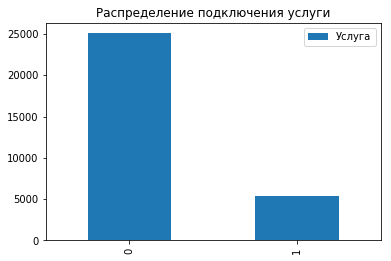

In [136]:
train['0'].value_counts().plot(kind='bar', label='Услуга')
plt.legend()
plt.title('Распределение подключения услуги');

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4165
Columns: 345 entries, 1 to 345
dtypes: float64(106), int64(239)
memory usage: 11.0 MB


In [3]:
# Разбиение на трейн и таргет
X_train = train.iloc[:,1:]
y = train.iloc[:,0]

### Снижение размерности, визуализация

In [5]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [6]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_train)

Wall time: 21min 53s


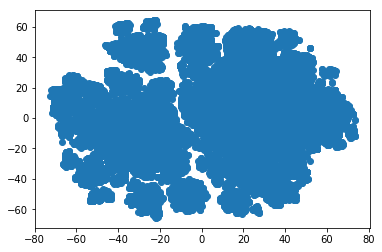

In [7]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

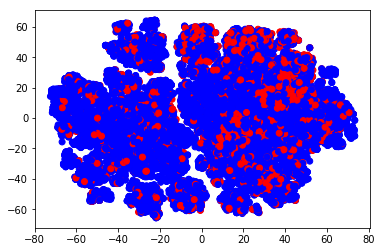

In [8]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=y.map({0: 'blue', 1: 'red'}));

### Дерево решений

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=seed, shuffle=True, stratify=y)

In [12]:
# Дерево решений
tree = DecisionTreeClassifier(max_depth=5, random_state=seed)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
roc_auc_score(y_val, tree_pred)

0.53763272394797179

In [13]:
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
roc_auc_score(y_val, knn_pred)

0.54769332555329409

In [77]:
# Подбор параметров дерева
tree_params = {'max_depth': [50],'max_features': [345]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
tree_grid = GridSearchCV(tree, tree_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [50], 'max_features': [345]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [78]:
print('Best parameters: ', tree_grid.best_params_)
print('roc_auc_cv: ', tree_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, tree_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, tree_grid.predict(X_val)))

Best parameters:  {'max_depth': 50, 'max_features': 345}
roc_auc_cv:  0.564676650641
roc_auc_train:  0.992738589212
roc_auc_val:  0.580734294811


In [50]:
print('Best parameters: ', tree_grid.best_params_)
print('roc_auc_cv: ', tree_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, tree_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, tree_grid.predict(X_val)))

Best parameters:  {'max_depth': 10, 'max_features': 345}
roc_auc_cv:  0.632223682429
roc_auc_train:  0.66862865734
roc_auc_val:  0.564960877735


In [67]:
tree_grid.grid_scores_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.63222, std: 0.01227, params: {'max_depth': 10, 'max_features': 345},
 mean: 0.61634, std: 0.01799, params: {'max_depth': 11, 'max_features': 345},
 mean: 0.60152, std: 0.01731, params: {'max_depth': 12, 'max_features': 345},
 mean: 0.58111, std: 0.01488, params: {'max_depth': 13, 'max_features': 345},
 mean: 0.57349, std: 0.01216, params: {'max_depth': 14, 'max_features': 345},
 mean: 0.55742, std: 0.01400, params: {'max_depth': 15, 'max_features': 345},
 mean: 0.54824, std: 0.00990, params: {'max_depth': 16, 'max_features': 345},
 mean: 0.54105, std: 0.01382, params: {'max_depth': 17, 'max_features': 345},
 mean: 0.53519, std: 0.01176, params: {'max_depth': 18, 'max_features': 345},
 mean: 0.52714, std: 0.00845, params: {'max_depth': 19, 'max_features': 345},
 mean: 0.52644, std: 0.01272, params: {'max_depth': 20, 'max_features': 345},
 mean: 0.52049, std: 0.00945, params: {'max_depth': 21, 'max_features': 345},
 mean: 0.52552, std: 0.00758, params: {'max_depth': 22, 'max_fea

In [47]:
%%time
# Дерево решений
tree = DecisionTreeClassifier(max_depth=50, max_features=345, random_state=seed)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
tree_pred_train = tree.predict(X_train)
print('roc_auc_val: ', roc_auc_score(y_val, tree_pred))
print('roc_auc_train: ', roc_auc_score(y_train, tree_pred_train))

roc_auc_val:  0.580734294811
roc_auc_train:  0.992738589212
Wall time: 2.52 s


In [72]:
pred_test = tree.predict(test)

In [75]:
d = {'_ID_': range(4166), '_VAL_': pred_test}
df = pd.DataFrame(data=d)
df.head()

,_ID_,_VAL_
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


In [76]:
df.to_csv('submit.csv', index=False)

### knn

In [112]:
# Подбор параметров knn
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 10)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
knn_grid = GridSearchCV(knn, knn_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

In [113]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 47.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc',
       verbose=True)

In [114]:
print('Best parameters: ', knn_grid.best_params_)
print('roc_auc_cv: ', knn_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, knn_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, knn_grid.predict(X_val)))

Best parameters:  {'n_neighbors': 9}
roc_auc_cv:  0.678788981951
roc_auc_train:  0.610346997613
roc_auc_val:  0.568126955539


In [115]:
%%time
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
print('roc_auc_train: ', roc_auc_score(y_train, knn.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, knn_pred))

roc_auc_train:  0.579133593192
roc_auc_val:  0.547693325553
Wall time: 1min 35s


In [116]:
%%time
# Метод k ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
print('roc_auc_train: ', roc_auc_score(y_train, knn.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, knn_pred))

roc_auc_train:  0.579133593192
roc_auc_val:  0.547693325553
Wall time: 6min 23s


### Случайный лес

In [130]:
%%time
forest = RandomForestClassifier(n_estimators=1000, max_depth = 50, max_features = 345, n_jobs=-1, random_state=seed)
forest.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, forest.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, forest.predict(X_val)))

roc_auc_train:  0.999884739511
roc_auc_val:  0.567360591038
Wall time: 5min 25s


In [131]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=seed)
forest_params = {'max_depth': [10,20,30,40,50],'max_features': [345]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
forest_grid = GridSearchCV(forest, forest_params, scoring = 'roc_auc', cv=cv, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [10, 20, 30, 40, 50], 'max_features': [345]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [132]:
print('Best parameters: ', forest_grid.best_params_)
print('roc_auc_cv: ', forest_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, forest_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, forest_grid.predict(X_val)))

Best parameters:  {'max_depth': 10, 'max_features': 345}
roc_auc_cv:  0.722507048529
roc_auc_train:  0.648533357105
roc_auc_val:  0.547598219167


### Логистическая регрессия

In [134]:
logit = LogisticRegression(n_jobs=-1, random_state=seed)

In [135]:
%%time
logit.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Wall time: 1.78 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
print('roc_auc_train: ', roc_auc_score(y_train, logit.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, logit.predict(X_val)))

roc_auc_train:  0.553944356175
roc_auc_val:  0.554931518808


In [5]:
C = np.logspace(-2, 3, 10)
C

array([  1.00000000e-02,   3.59381366e-02,   1.29154967e-01,
         4.64158883e-01,   1.66810054e+00,   5.99484250e+00,
         2.15443469e+01,   7.74263683e+01,   2.78255940e+02,
         1.00000000e+03])

In [14]:
C = np.logspace(-2, 3, 500)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
logit_grid = LogisticRegressionCV(Cs=C, cv=cv, scoring = 'roc_auc', verbose=True, n_jobs=-1)
logit_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.6min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.8min finished


LogisticRegressionCV(Cs=array([  1.00000e-02,   1.02334e-02, ...,   9.77192e+02,   1.00000e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=True)

In [15]:
logit_grid.C_

array([ 0.08747496])

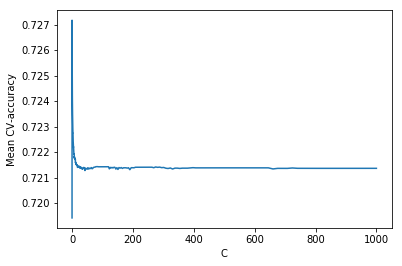

In [16]:
plt.plot(C, np.mean(logit_grid.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

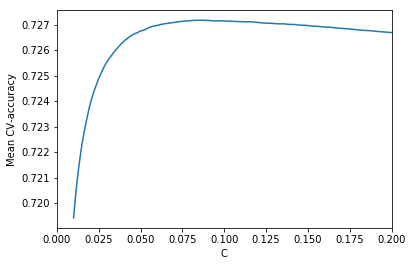

In [18]:
plt.plot(C, np.mean(logit_grid.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,0.2));

In [19]:
print('roc_auc_train: ', roc_auc_score(y_train, logit_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, logit_grid.predict(X_val)))

roc_auc_train:  0.543814038169
roc_auc_val:  0.545043670831


In [7]:
logit_grid.C_

array([ 0.12915497])

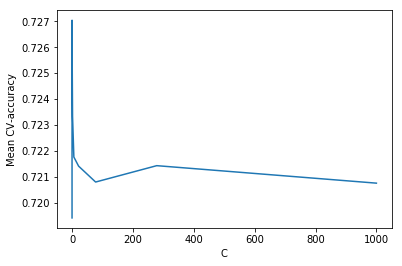

In [8]:
plt.plot(C, np.mean(logit_grid.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

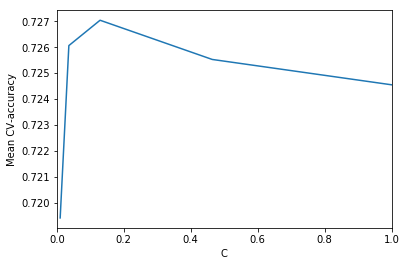

In [12]:
plt.plot(C, np.mean(logit_grid.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,1));

In [13]:
print('roc_auc_train: ', roc_auc_score(y_train, logit_grid.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, logit_grid.predict(X_val)))

roc_auc_train:  0.545841960922
roc_auc_val:  0.546488185214


#### Ridge регрессия

In [56]:
ridge = Ridge(alpha=0.1, random_state=seed)
ridge.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, ridge.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, ridge.predict(X_val)))

roc_auc_train:  0.744576759027
roc_auc_val:  0.718327597852


In [ ]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [70]:
alphas = list(frange(0, 100, 0.1))
ridge_cv = RidgeCV(alphas=alphas, cv=cv, scoring = 'roc_auc')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.100000...9999862, 99.59999999999862, 99.69999999999861, 99.7999999999986, 99.8999999999986, 99.9999999999986],
    cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring='roc_auc',
    store_cv_values=False)

In [71]:
print('Best parameters: ', ridge_cv.alpha_)
#print('roc_auc_cv: ', forest_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, ridge_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, ridge_cv.predict(X_val)))

Best parameters:  73.90000000000008
roc_auc_train:  0.739929317318
roc_auc_val:  0.720589935263


In [74]:
pred_test = ridge_cv.predict(test)

In [75]:
pred_test

array([ 0.11695343,  0.39286592,  0.22152217, ...,  0.00313677,
        0.11124567,  0.23183533])

In [72]:
pred_test = ridge.predict(test)
d = {'_ID_': range(4166), '_VAL_': pred_test}
df = pd.DataFrame(data=d)
df.to_csv('submit.csv', index=False)

In [73]:
df.head()

,_ID_,_VAL_
0,0,0.102637
1,1,0.433846
2,2,0.204976
3,3,0.347068
4,4,0.418889


#### Lasso регрессия

In [88]:
lasso = Lasso(alpha=0.0001, random_state=seed)
lasso.fit(X_train, y_train)
print('roc_auc_train: ', roc_auc_score(y_train, lasso.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, lasso.predict(X_val)))

roc_auc_train:  0.739673092252
roc_auc_val:  0.7199435794


In [103]:
alphas = np.logspace(-5, -0.5, 50)
lasso_cv = LassoCV(alphas=[0.0001], cv=cv, n_jobs=-1, random_state=seed, verbose=True)
lasso_cv.fit(X_train, y_train)

.....[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


LassoCV(alphas=[0.0001], copy_X=True,
    cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=False, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=True)

In [104]:
print('Best parameters: ', lasso_cv.alpha_)
#print('roc_auc_cv: ', forest_grid.best_score_)
print('roc_auc_train: ', roc_auc_score(y_train, lasso_cv.predict(X_train)))
print('roc_auc_val: ', roc_auc_score(y_val, lasso_cv.predict(X_val)))

Best parameters:  0.0001
roc_auc_train:  0.739673092252
roc_auc_val:  0.7199435794
